<a href="https://colab.research.google.com/github/tansexe/AD-Lab/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the tensorflow library
import tensorflow as tf
print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.17.1


In [ ]:
#importing the mnist dataset and do the tuple unpacking
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#flatening to 1d array so that we can insert it into the fully connected neural network
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [ ]:
# converting the datatype to float value and normalising it
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
print("Follwoing are the normalised values")
print(x_train[0])

Follwoing are the normalised values
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.      

In [ ]:
print(y_train[0])

5


In [ ]:
# now we will convert the labels into one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Now we will define the hyperparameters according to the architecture

n_input = 784
n_hidden_1 = 512
n_hidden_2 = 256
n_hidden_3 = 128
n_output = 10

# learning rate
learning_rate = 1e-4

In [ ]:
# Now we will define the model for the fully connected neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(n_hidden_1, input_shape = (n_input,), activation= 'relu'),
    tf.keras.layers.Dense(n_hidden_2, activation= 'relu'),
    tf.keras.layers.Dense(n_hidden_3, activation= 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(n_output, activation= 'softmax')
])

In [ ]:
# compiling the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 100,
    validation_data = (x_test, y_test)
)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1010 - loss: 2.3664 - val_accuracy: 0.1230 - val_loss: 2.3128
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1130 - loss: 2.3329 - val_accuracy: 0.1538 - val_loss: 2.2829
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1271 - loss: 2.3034 - val_accuracy: 0.1883 - val_loss: 2.2558
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1476 - loss: 2.2717 - val_accuracy: 0.2251 - val_loss: 2.2309
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1708 - loss: 2.2479 - val_accuracy: 0.2682 - val_loss: 2.2074
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1910 - loss: 2.2257 - val_accuracy: 0.3132 - val_loss: 2.1850
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2135 - loss: 2.2034 - val_accuracy: 0.3583 - val_loss: 2.1631
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2363 - loss: 2.1820 - val_accu

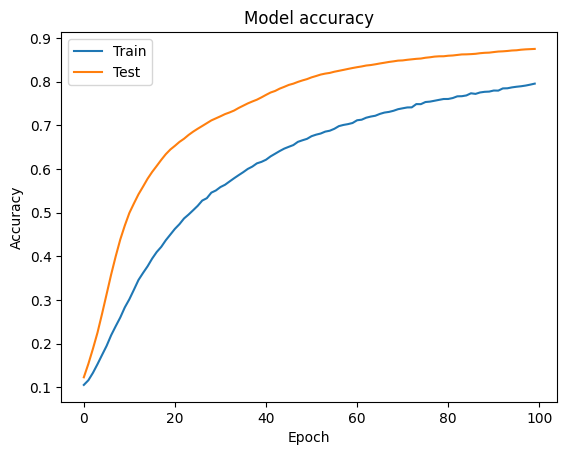

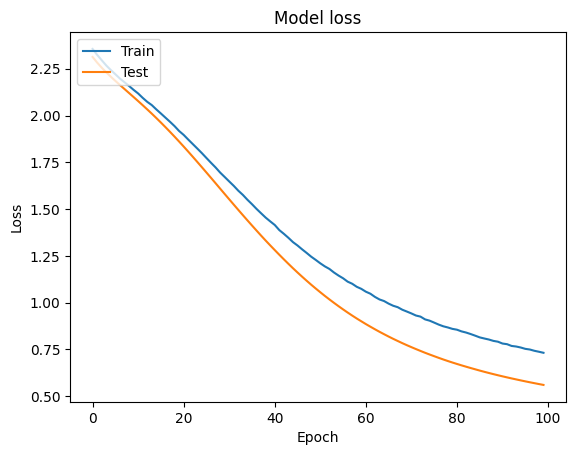

In [ ]:
# prompt: plot the graph for loss and accuracy

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()